<a href="https://colab.research.google.com/github/fahammed2022/Classification-and-Regression/blob/main/Fahad_ahammed_A1_starter_CAP6619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Handwritten Digit Classifier Using the MNIST Dataset
## Name: Fahad Ahammed
##Z number: Z23685691

##Notebook : https://colab.research.google.com/drive/1K07XlNO-i-NhBtjNJyPAz7ezolnanhx1?usp=sharing


Useful references and sources:

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database

- https://keras.io/examples/vision/mnist_convnet/

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

**QUESTION 1: Explain the meaning and contents of each of the variables above.**

**Answer:**

**X_training :** X_training is the portion of the dataset that was used to train the model by using the features.

**y_training:** y_training is the target portion of our traning data. We train this portion of data for what we should receive or expect.

**X_validation:** X_validation is used for test or validate the model we built. The features are what we use to evaluate how accurate the model is.

**y_validation:** y_validation is the portion of the data from the test or validation set that is used to test the results of our model


**QUESTION** **2: Explain the meaning of the results you get when you run**
**bold textmodel.summary() (see figure below).**

**Answer:** So basically it's a sequential model that is imported from keras. It works from one layer on the top to another layer. In this model, we have 2 layers. One is the input layer and another is the output layer. The input layer has 64 neurons, a sigmoid function, and an input vector with the shape of 784. The output layer is dense with 10 neurons and a softmax activator. If we multiply 64 by 784 and add 64 biases, we get 50,240. If we multiply 64 by 10 and add the 10 bias terms, we get 650 and after adding these 2 up we get 50,890. So we got total of 50,890 trainable parameters.

**QUESTION 3: Does the model show any indication of overfitting? Why (not)?**

**Answer:** We know overfitting is a term when the model remembers the data and perform poorly for the new data. In our model I can see that the network has achieved good accuracy on both train and test sets and low values of loss in both train and test sets. That means it performed well when the validation data was given and the accuracy was nearly 0.90249. As both of the traning and validation went through the same direction for loss and accuracy curves, we can also observer that no overfitting or underfitting happened. So **NO** indication of overfitting here.

### (OPTIONAL) TODO 1

To understand which **loss function** have to use for which purpose, this blog helped to work on Optional TODO 2 : https://neptune.ai/blog/keras-loss-functions

For **confusion matrix** this URL helped:

https://www.milindsoorya.com/blog/handwritten-digits-classification

https://conx.readthedocs.io/en/latest/MNIST.html






## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras import layers

from matplotlib import pyplot as plt

import numpy as np

## Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

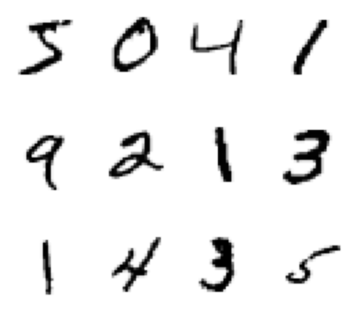

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

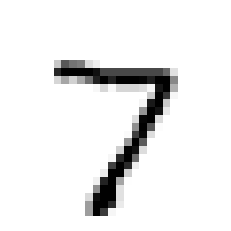

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## PART 1 - Shallow neural network architecture

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

### (OPTIONAL) TODO 2

Try different options for `loss` and `optimizer`

I have used different optimizer and loss function for the same model and got differet results. I used categorical_crossentropy as a loss function and Adam for the optimizer. After changing those parameters I trained the model again for 500 epoch and got 0.97 accuracy this time. But its clearly visible that the model achived a huge loss during traning. The traning set achived the accuracy of 1.00 after running only 76 epoch and then it started overfitting.


```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

```


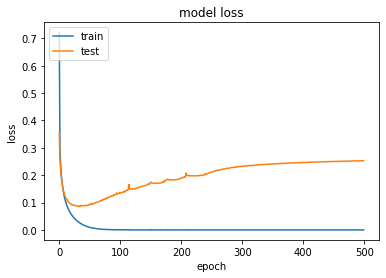

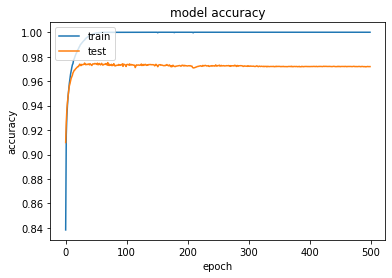

Here's the  notebook link for my **Optional TODO 2**. https://colab.research.google.com/drive/1B54A9zYSWdWO7YIQQN6Catrw15iKCNj_?usp=sharing

### Train!

In [ ]:
batch_size=128
epochs=500

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/500
469/469 [==============================] - 3s 4ms/step - loss: 0.0933 - accuracy: 0.0884 - val_loss: 0.0925 - val_accuracy: 0.0856
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.0921 - accuracy: 0.0958 - val_loss: 0.0917 - val_accuracy: 0.1110
Epoch 3/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.1202 - val_loss: 0.0911 - val_accuracy: 0.1352
Epoch 4/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.1405 - val_loss: 0.0907 - val_accuracy: 0.1543
Epoch 5/500
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.1576 - val_loss: 0.0902 - val_accuracy: 0.1716
Epoch 6/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1737 - val_loss: 0.0899 - val_accuracy: 0.1923
Epoch 7/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.1948 - val_loss: 0.0895 - val_accuracy: 0.2152

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


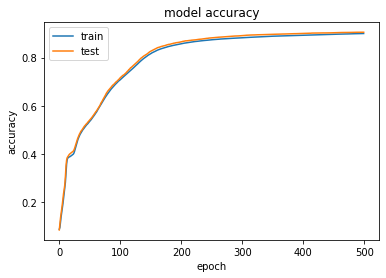

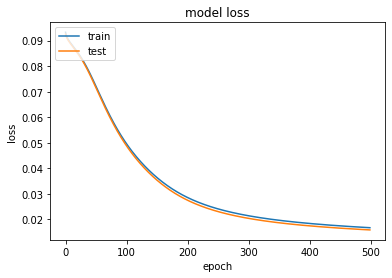

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9052


[0.015920167788863182, 0.9052000045776367]

### TODO 3

Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides.

See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

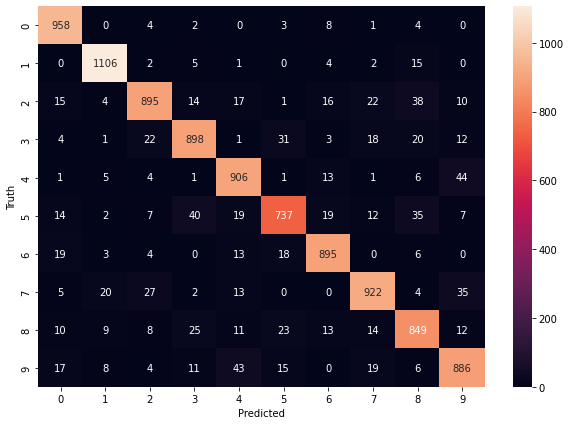

In [ ]:
import tensorflow as tf
predicted = model.predict(X_validation)
y_predicted_labels = [np.argmax(i) for i in predicted] # converted with the 10 digit output

pred = y_validation
y_validation_labels = [np.argmax(i) for i in pred] # converted with the 10 digit output

My_Confusion_matrix = tf.math.confusion_matrix(labels=y_validation_labels, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(My_Confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


**The confusion matrix** actually depicts the False positive and False negative for evaluating the performance of a classification model. The two important parameters are false positive and false negative. False positive is the actual value was negative but the model predicted a positive value. And the false negative is the actual value was positive but the model predicted a negative value. In our model, we can see that 0 is detected as 0, 957 times. But 0 is predicted as 6, 20 times. We can also see that digit 6 performs poorly. 732 times 6 predicted as 6. For digit 1 predicted as 1, 1104 times. Most of the mistakes I can see for digit 9 which predicted digit 4, 43 times as 9. Similarly, we can see the true value vs the predicted value for the digit 0 to 9.

### (OPTIONAL) TODO 4

Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

See [this](https://conx.readthedocs.io/en/latest/MNIST.html) for an example.

In [ ]:
predicted = model.predict(X_validation)
y_predicted_labels = [np.argmax(i) for i in predicted]

pred = y_validation
y_validation_labels = [np.argmax(i) for i in pred]

wrong = [i for i in range(len(y_validation_labels)) if y_validation_labels[i] != y_predicted_labels[i]]

print('Network classified the following', len(wrong), 'test inputs incorrectly:')
#print(wrong[:10])
misclassifications = [y_predicted_labels[i] for i in wrong]
print("The 10 predicted values are")
print(misclassifications[:10])
print("The 10 true values are")
print(y_predicted_labels[:10])


313/313 [==============================] - 0s 1ms/step
[8, 33, 46, 62, 63, 77, 87, 111, 124, 144]
[6, 6, 3, 4, 2, 7, 5, 1, 4, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


## PART 2 - Convolutional neural network (CNN) architecture

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Train!


In [ ]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 9s 6ms/step - loss: 0.3448 - accuracy: 0.8957 - val_loss: 0.0811 - val_accuracy: 0.9768
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0540 - val_accuracy: 0.9841
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0669 - accuracy: 0.9793 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0591 - accuracy: 0.9811 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0313 - val_accuracy: 0.9889
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0295 - val_accuracy: 0.9896
Epoch 

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


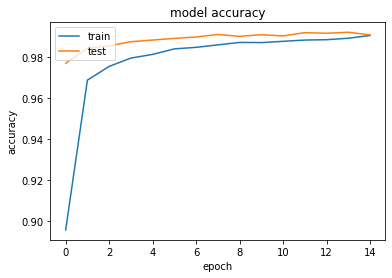

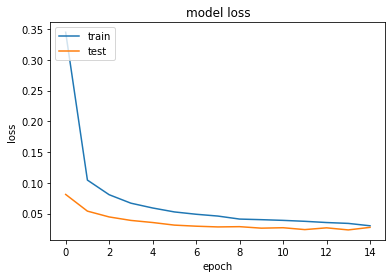

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9906


[0.027586443349719048, 0.9905999898910522]

**QUESTION 4: How do the accuracy and loss compare to the previous model?**
**What can you infer from this comparison?**

**Answer:** We can see that our model improved a lot while using CNN and gained an accuracy of 0.9905 which is far better than the Shallow neural network. We used sequential model in both architecture but in CNN we added some extra layers with relu and softmax activators. In CNN we have less parameters(34,826) and only 15 epoch was run for traning the model where we had to run 500 epoch for shallow neural network. During the first epoch of our CNN model, we can see that the traning_loss is 0.3448 and the val_loss 0.0811. After running a few epoch, the traning_loss became 0.0301 and the val_loss became 0.0276. For the CNN model we can see the validation data got less loss and highest accuracy for the **epoch number 13**. When we evaluate the 2 model, we can discover than the shallow network has lower loss than the CNN which is 0.0159 and 0.0276 repectively.

For loss function if we compare the 2 model, we can see that shalow network was able to minimize the loss after 100 epoch where the CNN model was able to reduce the loss significantly only after one epoch.

For accuracy the same thing happened. Shallow network required 100+ epoch to achive the increase of accuracy but in one epoch CNN climbed from 0.90 to 0.98. In our CNN model we can also see that the validation loss is lower than the traning data thats why the validation accuracy curve was higer than the traning accuracy curve.

Finally, we can conclude that the CNN network has built more stable model where the validation loss is less than the traning loss and thats why we can get a higher accuracy for the validation accuracy than the training accuracy. As both of the validation and accuracy curves went through the same direction we can also observer that no overfitting or underfitting happened.



# Conclusion

In this project, we learned how to use Python, Keras, TensorFlow, and python IDE to construct an image classification solution. We used the MNIST handwriting digit classification dataset and applied it to fully connected neural networks and convolutional neural networks (CNNs). We learned how to develop a sequential model using Keras and TensorFlow to build a classifier/model to train the dataset and test it. Additionally, we saw how different loss functions and accuracy work and how to show them in a plot by using another python package called matplotlib. We evaluated the performance between a shallow neural network architecture and a Convolutional neural network (CNN) architecture and our findings demonstrate that CCN outperformed over the shallow neural network model.